## Create Initial states

In [1]:
import numpy as np
from pathlib import Path
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt

from src.models.normal import NormalDegradationModel as NModel

In [2]:
data_name = "DS03"

device = "cpu"
experiment_dir = Path('experiments')/data_name
states_dir = experiment_dir/'states'
os.makedirs(states_dir, exist_ok=True)

## Import training data


In [3]:
hi_df = pd.read_csv(experiment_dir/'hidata_dev.csv')
units = hi_df['unit'].astype(int).unique().tolist()
units 

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Extract degradation onset

In [4]:
onsets = {unit: hi_df[(hi_df['unit']==unit) & (hi_df['hs']==0)]['cycle'].values[0] 
          for unit in units}
del hi_df['hs']

In [5]:
perform_names = [col for col in hi_df.columns if col not in ['unit','cycle']]

performs = {name: 
    {unit: hi_df[hi_df['unit']==unit][name].values for unit in units} 
    for name in perform_names
}
time = {unit: hi_df[hi_df['unit']==unit]['cycle'].values for unit in units}

## Load best model

Plotting for perform: T48
  Unit: 1


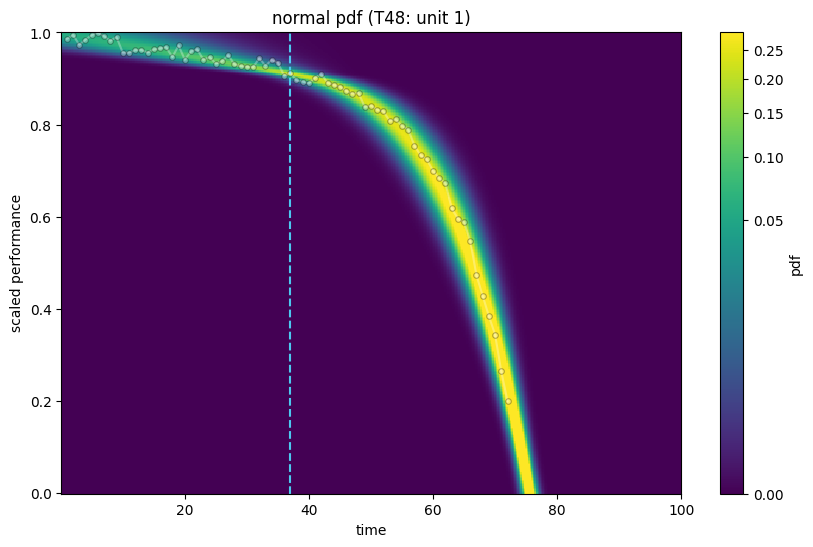

  Unit: 2


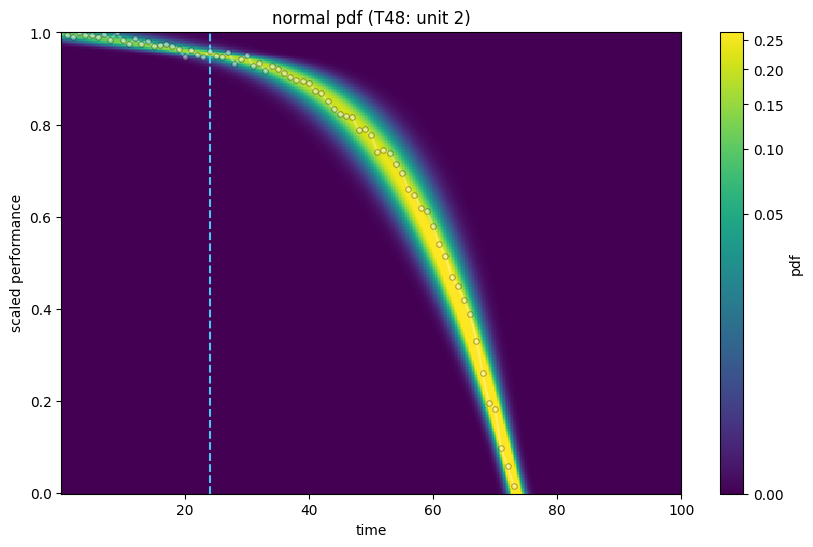

  Unit: 3


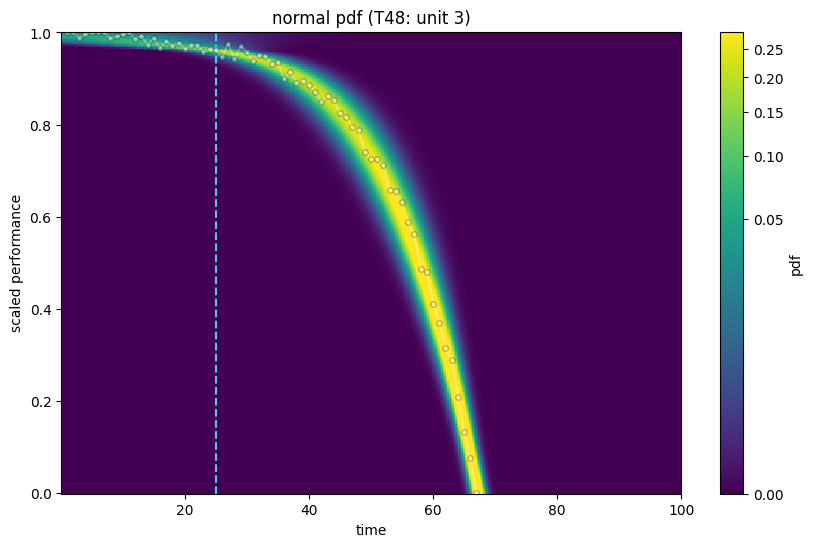

  Unit: 4


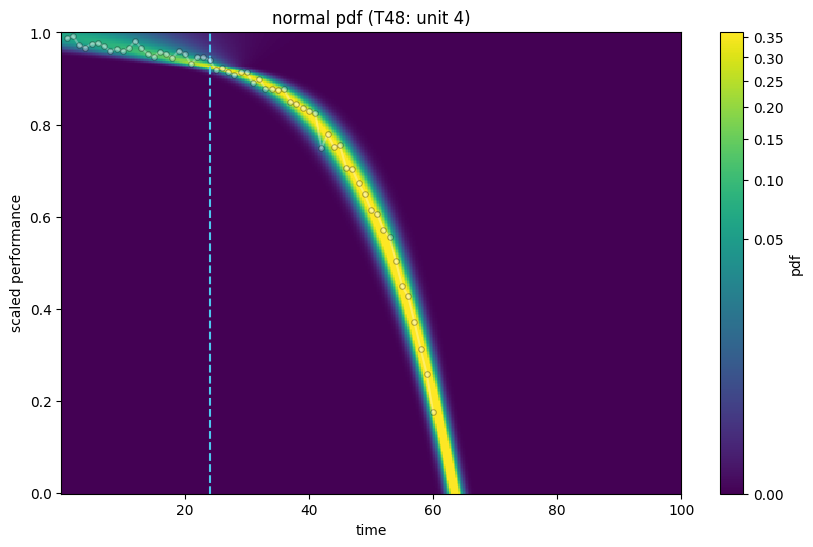

  Unit: 5


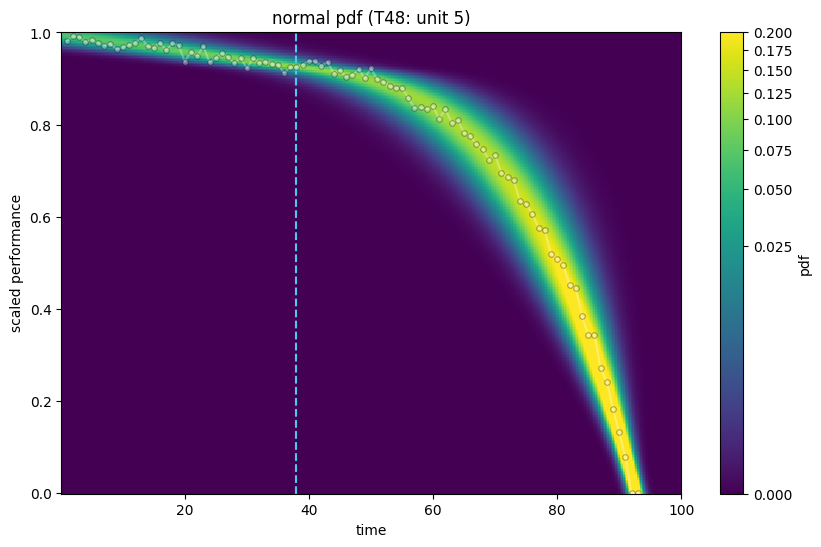

  Unit: 6


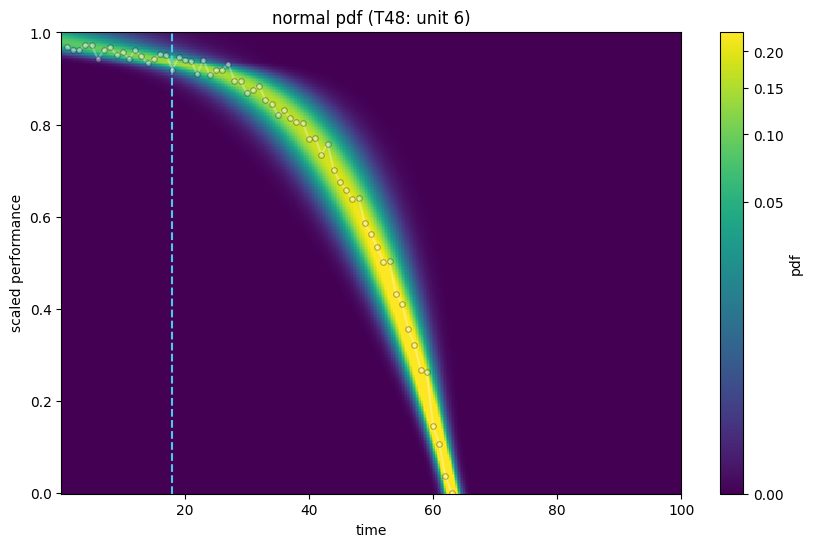

  Unit: 7


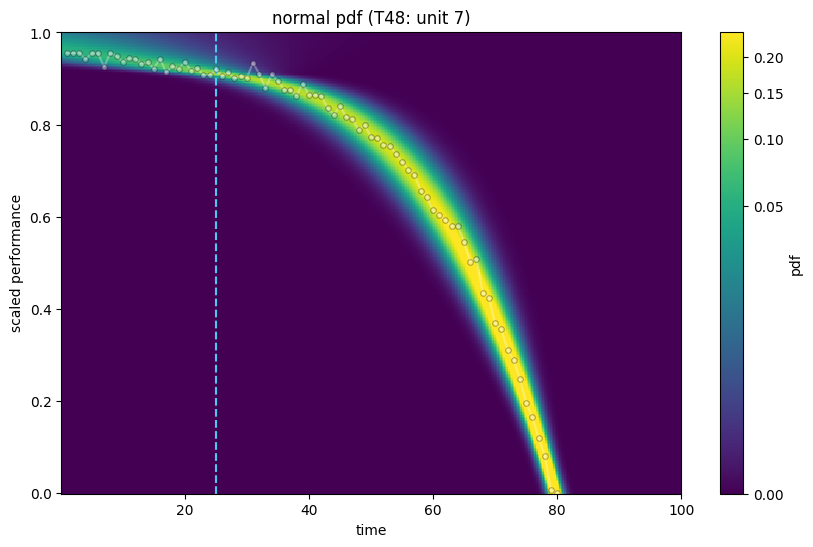

  Unit: 8


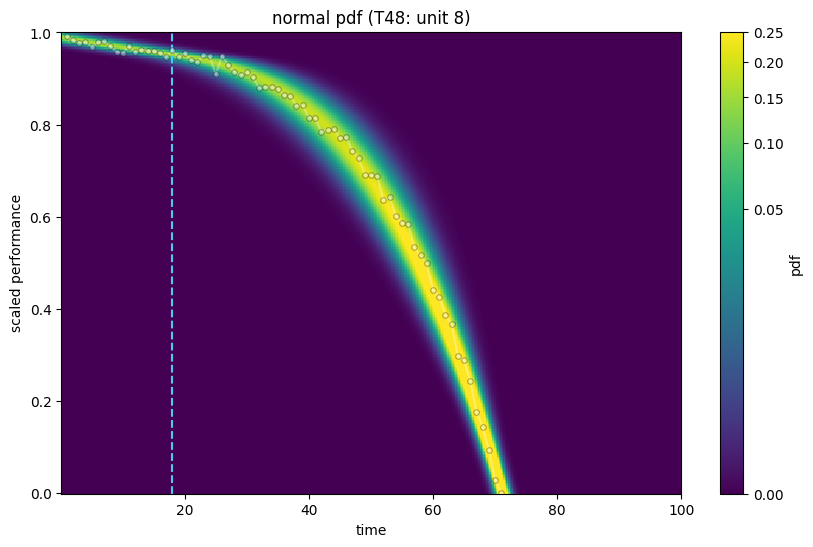

  Unit: 9


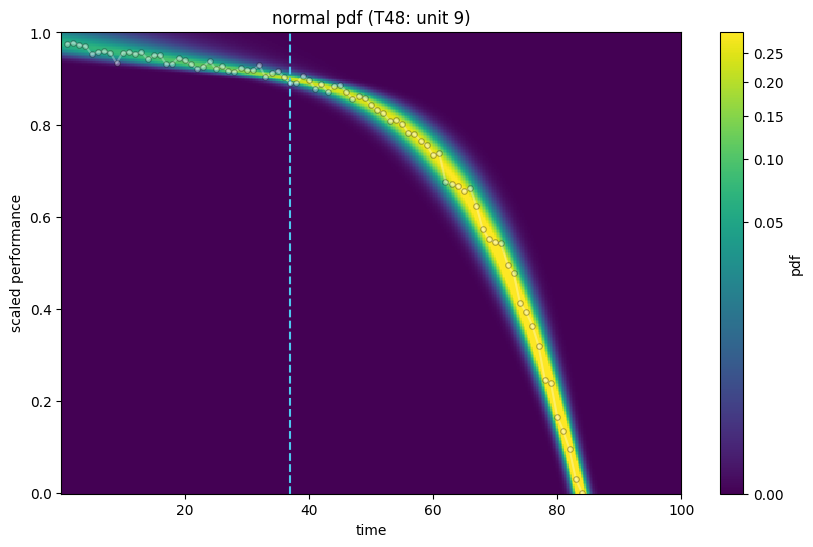

Plotting for perform: SmLPC
  Unit: 1


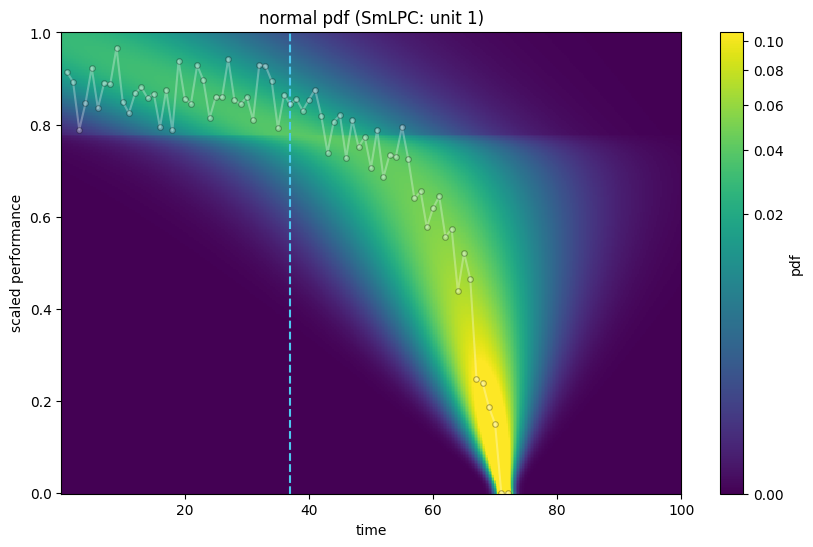

  Unit: 2


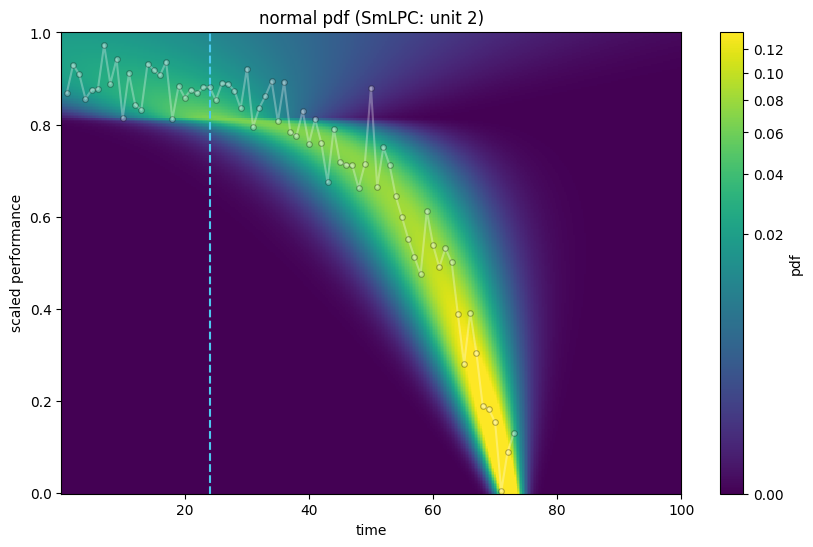

  Unit: 3


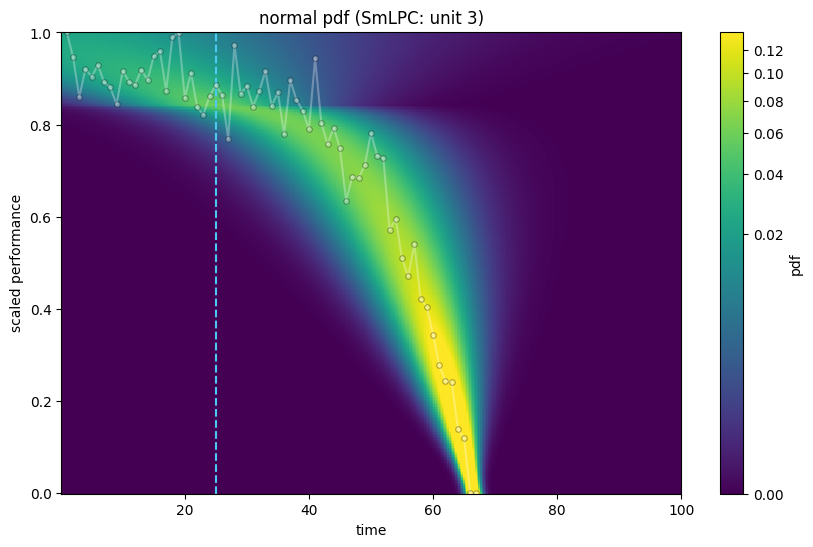

  Unit: 4


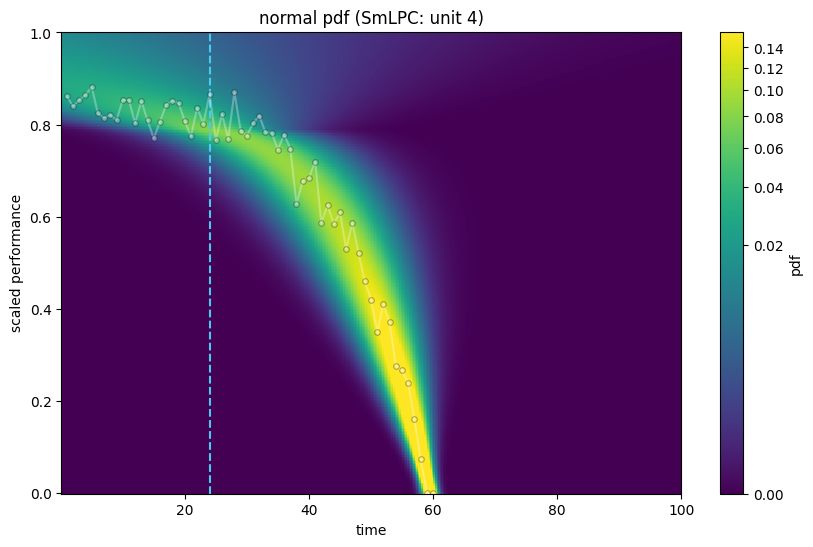

  Unit: 5


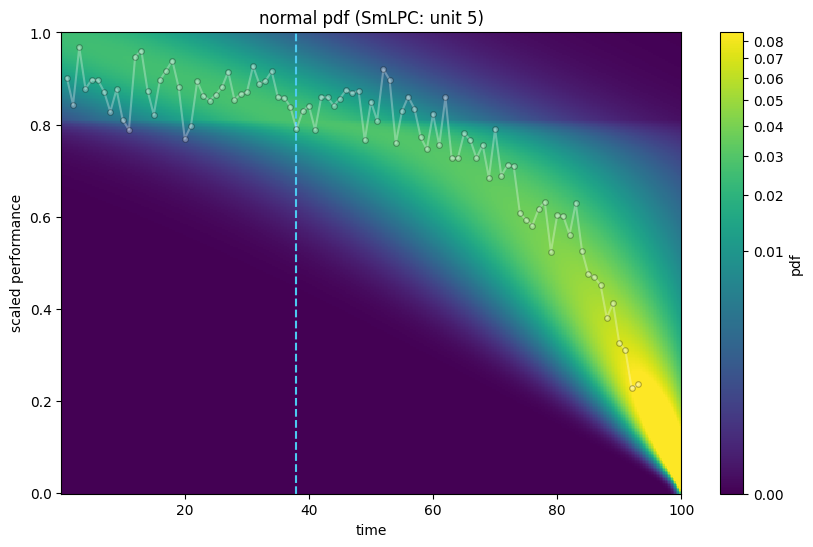

  Unit: 6


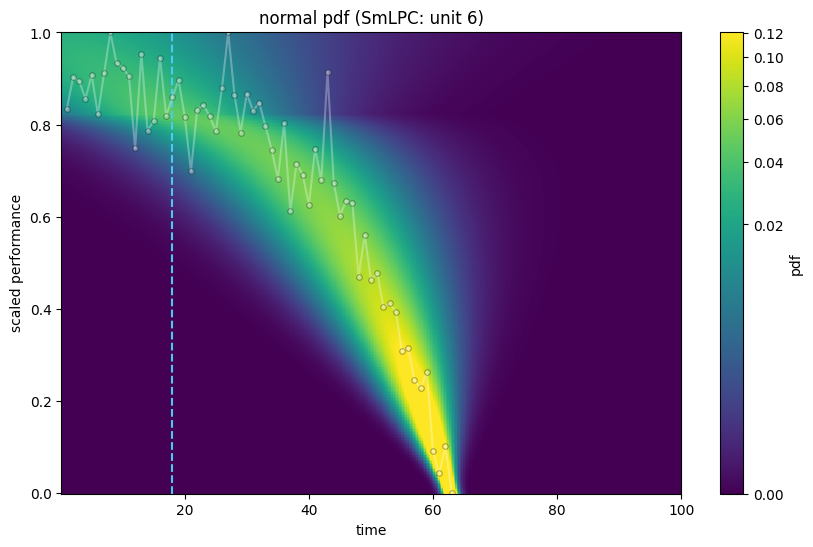

  Unit: 7


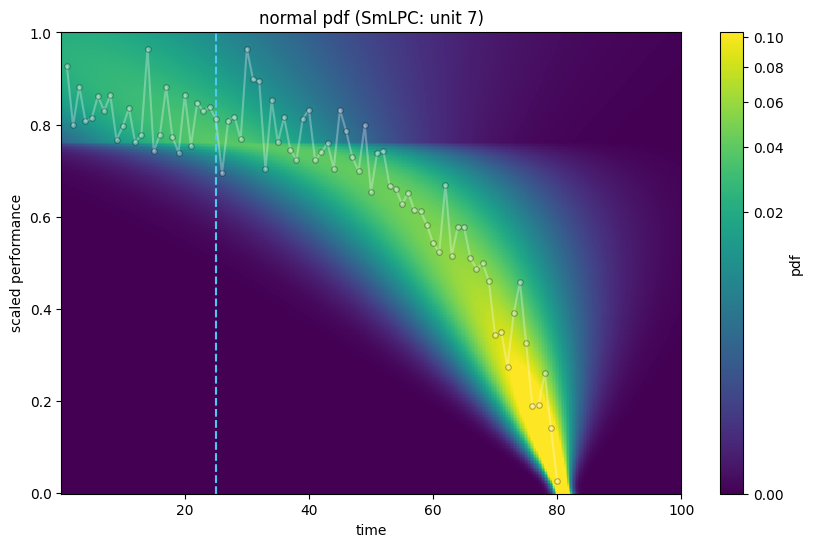

  Unit: 8


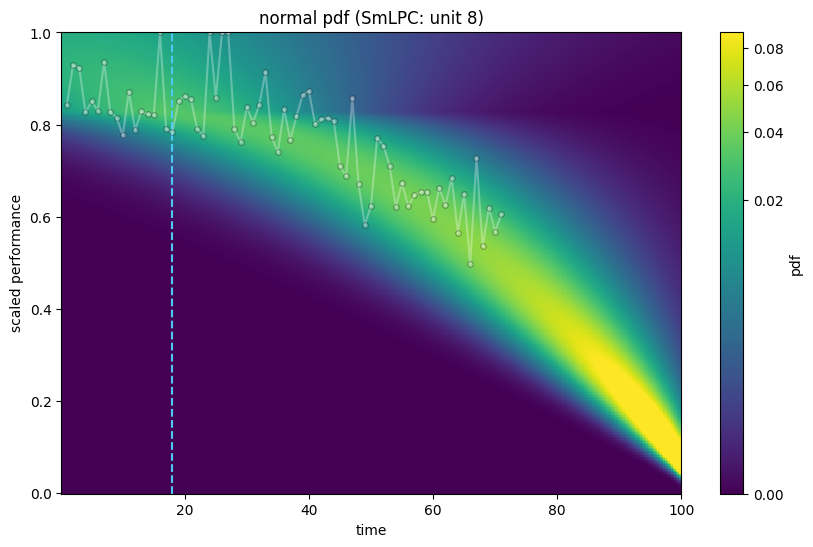

  Unit: 9


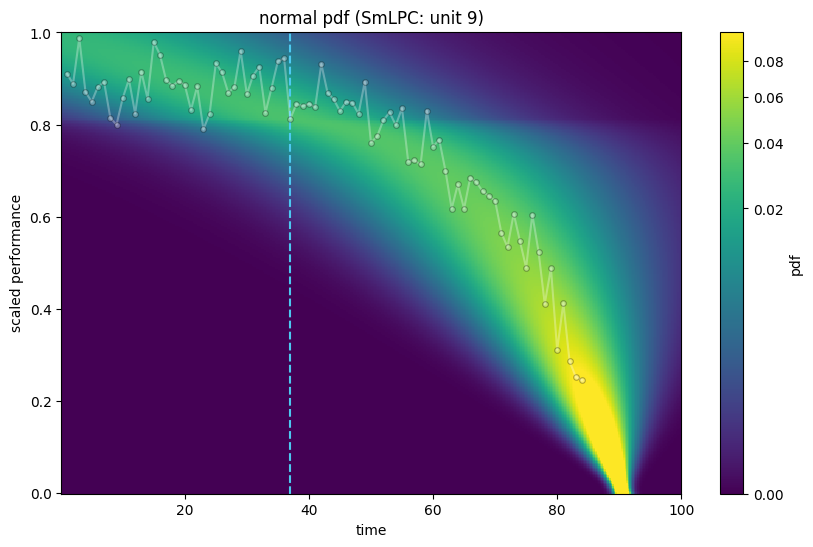

Plotting for perform: SmHPC
  Unit: 1


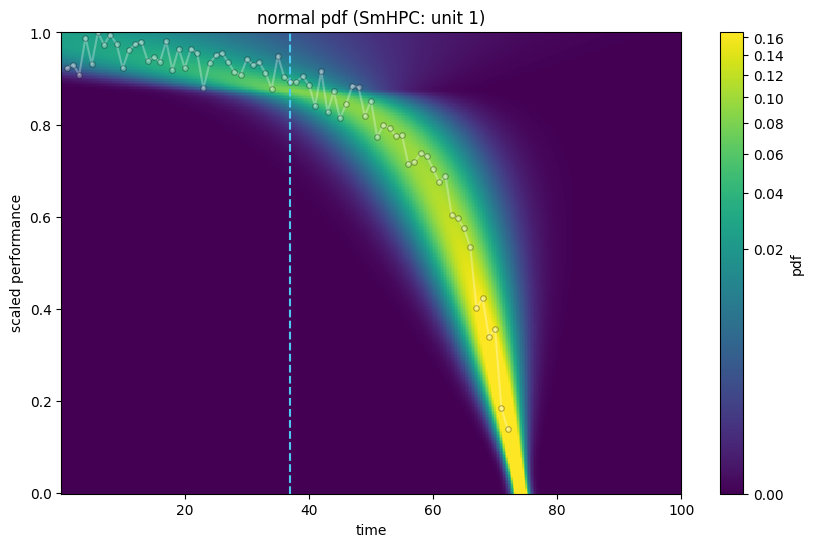

  Unit: 2


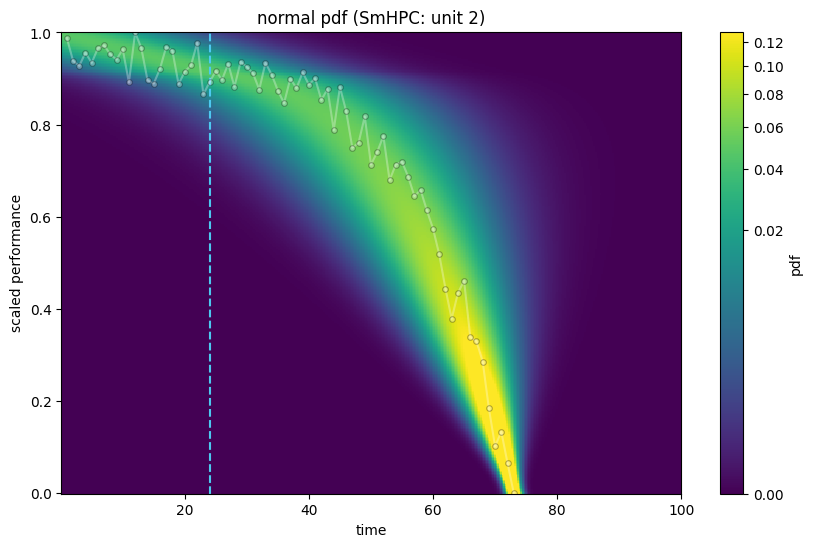

  Unit: 3


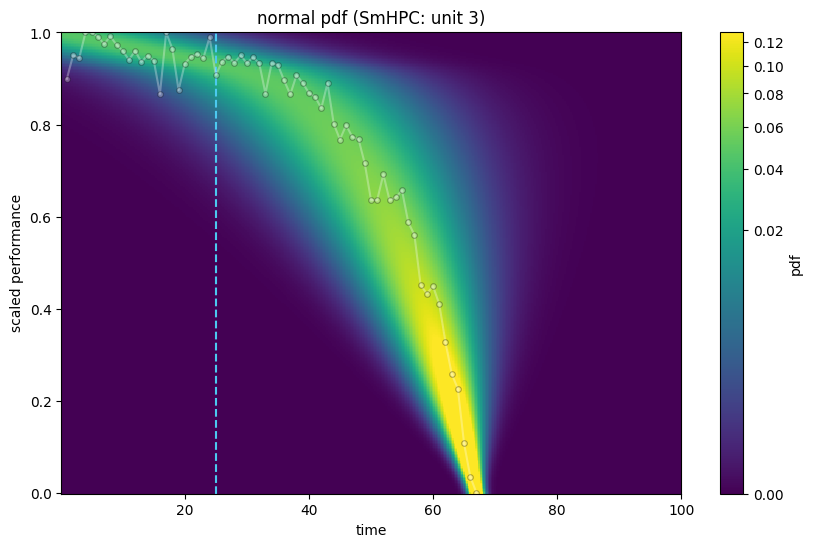

  Unit: 4


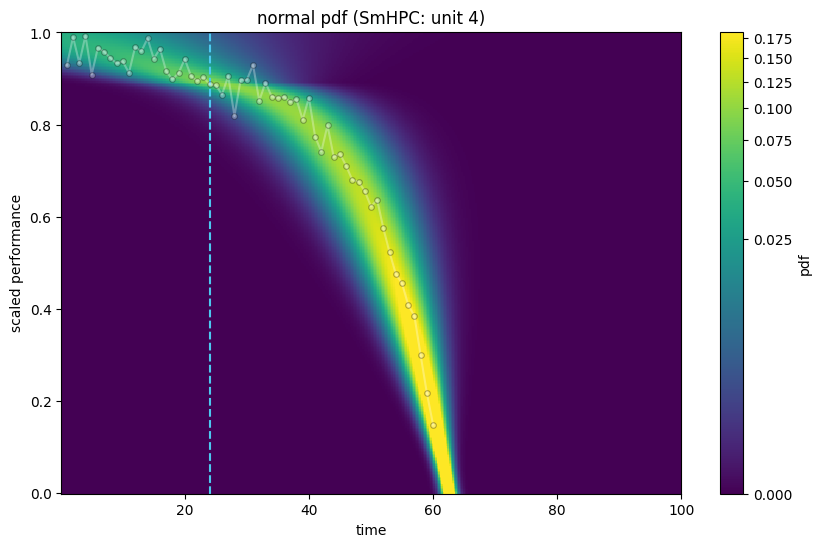

  Unit: 5


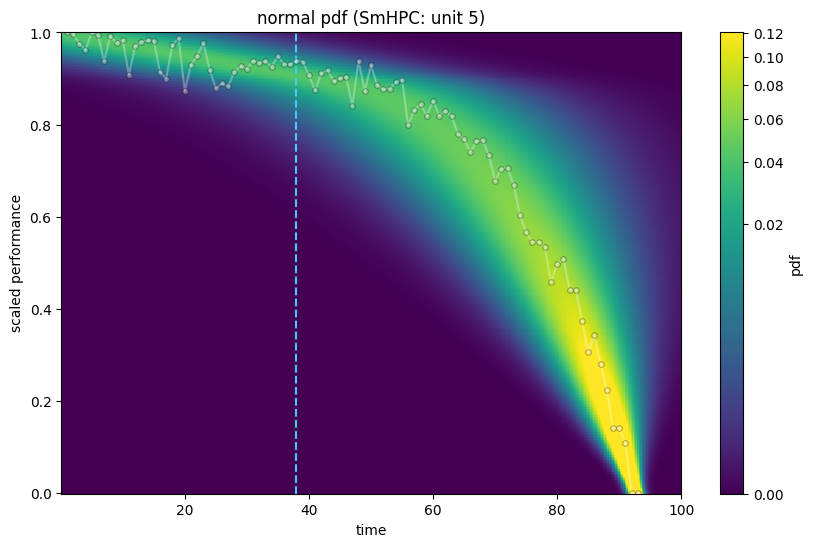

  Unit: 6


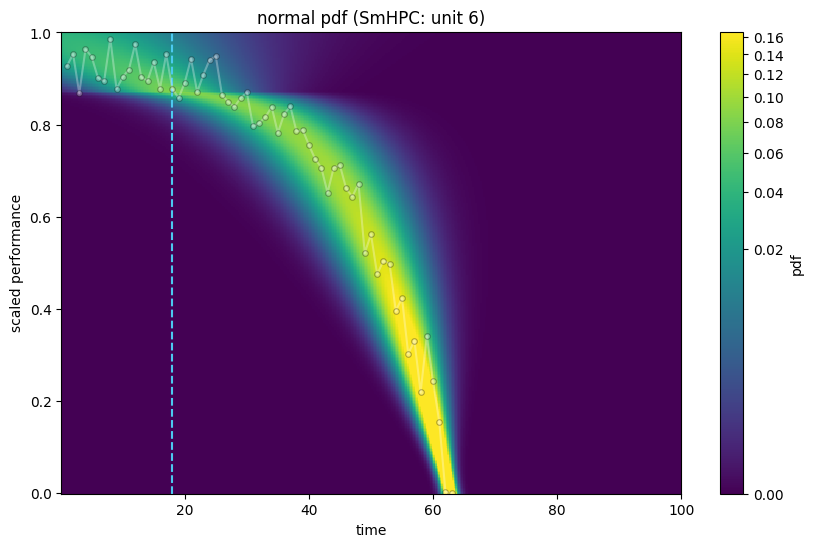

  Unit: 7


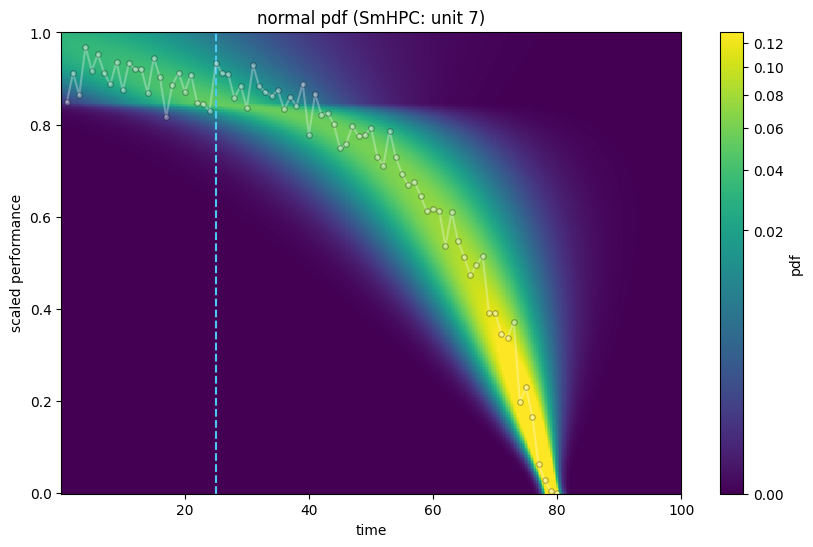

  Unit: 8


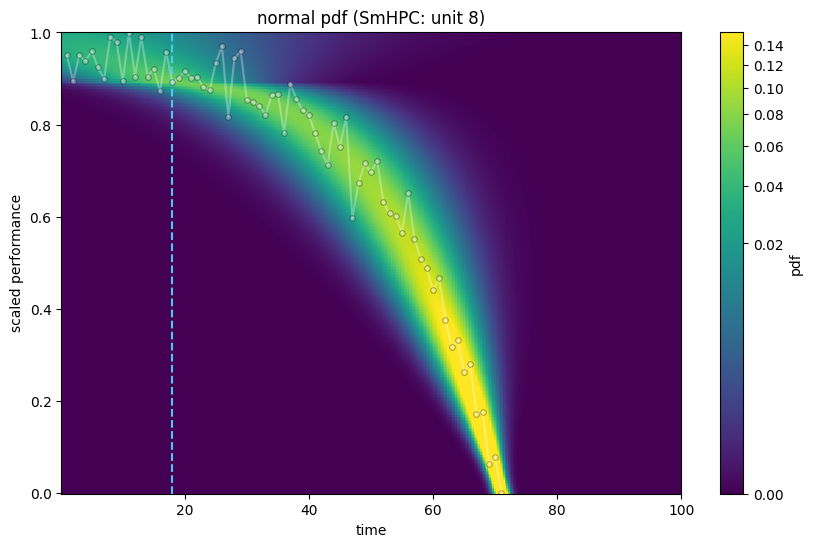

  Unit: 9


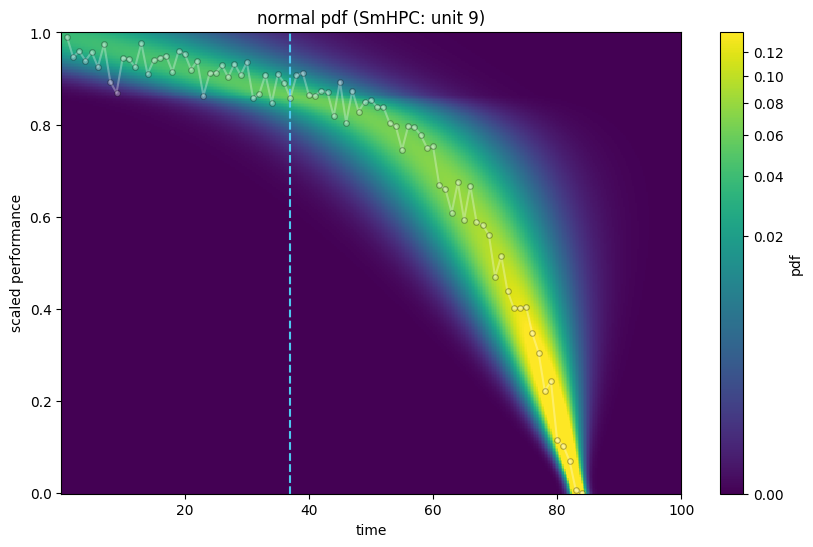

In [6]:
t = np.linspace(0.1, 100, 400)  # Start from 0.1 instead of 0.0 (LogNormal support is t > 0)
s = np.linspace(0.0, 1.0, 300)


for name, units_perform in performs.items():
	print(f"Plotting for perform: {name}")
	for unit, perform in units_perform.items():
		print(f"  Unit: {unit}") 

		s_np:np.ndarray = perform
		t_np:np.ndarray = time[unit]

		best_model = NModel(onset=onsets[unit])
		best_model.load_state_dict(
			torch.load(states_dir /name/f'unit_{unit}'/ "best_model.pt", map_location=device)
		)
		best_model.to(device)
		best_model.eval()

		ax = best_model.plot_distribution(
			t=t,
			s=s,
			func="pdf",
			title=f"normal pdf ({name}: unit {unit})",
		)



		ax.set_xlim([t.min(), t.max()])
		ax.plot(t_np,s_np,'o-',
				color='white',alpha=0.3,markersize=4,markeredgecolor='black',markeredgewidth=0.8,
				label='data')
		plt.show()

## Show parameters

In [7]:
for p in best_model.named_parameters():
    print(p)

('m0_raw', Parameter containing:
tensor(1.9467, requires_grad=True))
('m1_raw', Parameter containing:
tensor(83.3538, requires_grad=True))
('mp_raw', Parameter containing:
tensor(-1.5505, requires_grad=True))
('v0_raw', Parameter containing:
tensor(-10.0842, requires_grad=True))
('v1_raw', Parameter containing:
tensor(7.7622, requires_grad=True))
('mn_raw', Parameter containing:
tensor(9.7392, requires_grad=True))
('vn_raw', Parameter containing:
tensor(27.5847, requires_grad=True))
